## mnist-classification

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

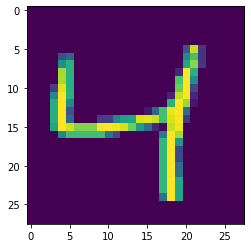

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [10]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2808 - accuracy: 0.9198 - val_loss: 0.1520 - val_accuracy: 0.9536
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1181 - accuracy: 0.9653 - val_loss: 0.1030 - val_accuracy: 0.9693
Epoch 3/25
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0820 - accuracy: 0.9755 - val_loss: 0.1031 - val_accuracy: 0.9688
Epoch 4/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0619 - accuracy: 0.9807 - val_loss: 0.0886 - val_accuracy: 0.9722
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0470 - accuracy: 0.9850 - val_loss: 0.0942 - val_accuracy: 0.9727
Epoch 6/25
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0386 - accuracy: 0.9879 - val_loss: 0.0995 - val_accuracy: 0.9727
Epoch 7/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0318 - accuracy: 0.9895 - val_loss: 0.0950 - val_accurac

In [11]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [12]:
y_pred = y_prob.argmax(axis=1)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9751

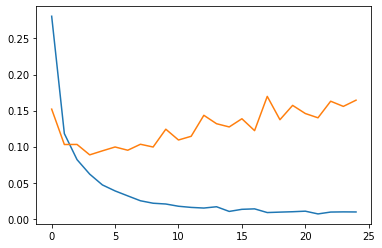

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

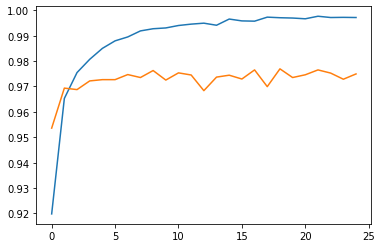

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

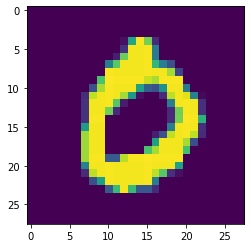

In [18]:
plt.imshow(X_test[3])

In [19]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 46ms/step


array([2])